### Credential's

#### Name : Mayank Anand
#### Registration Number : 2141001045

In [47]:
# importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Exploratory data analysis (EDA)

In [48]:
# to load the dataset

df = pd.read_csv("Training Dataset.csv")

In [49]:
# to view the first few data's of the dataframe

df.head()

timestamp  value  is_anomaly  predicted
0  1425008573     42       False  44.072500
1  1425008873     41       False  50.709390
2  1425009173     41       False  81.405120
3  1425009473     61       False  39.950367
4  1425009773     44       False  35.350160

In [50]:
# to view the last few data's of the dataframe

df.tail()

timestamp  value  is_anomaly  predicted
15825  1429756073     44       False  53.624115
15826  1429756373     45       False  59.752296
15827  1429756673     48       False  52.147630
15828  1429756973     26       False  58.007545
15829  1429757273     38       False  59.144700

In [51]:
# to display about the total number of rows and columns in the dataset

df.shape

(15830, 4)

In [52]:
# to get info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15830 entries, 0 to 15829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15830 non-null  int64  
 1   value       15830 non-null  int64  
 2   is_anomaly  15830 non-null  bool   
 3   predicted   15830 non-null  float64
dtypes: bool(1), float64(1), int64(2)
memory usage: 386.6 KB


In [53]:
# to get statistical information about the dataset

df.describe()

timestamp         value     predicted
count  1.583000e+04  15830.000000  15830.000000
mean   1.427383e+09     85.572205     71.870715
std    1.370962e+06    321.760918     92.450520
min    1.425009e+09      0.000000   -281.389070
25%    1.426196e+09     29.000000     32.919171
50%    1.427383e+09     47.000000     49.771124
75%    1.428570e+09     76.000000     75.948052
max    1.429757e+09  13479.000000   2716.127200

In [54]:
# to get to know the columns name 

df.columns

Index(['timestamp', 'value', 'is_anomaly', 'predicted'], dtype='object')

In [55]:
# to count how many value are anamoly and not

count=df['is_anomaly'].value_counts()
count

False    15054
True       776
Name: is_anomaly, dtype: int64

In [56]:
# to know the datatypes of the columns

df.dtypes

timestamp       int64
value           int64
is_anomaly       bool
predicted     float64
dtype: object

### Data Visualization

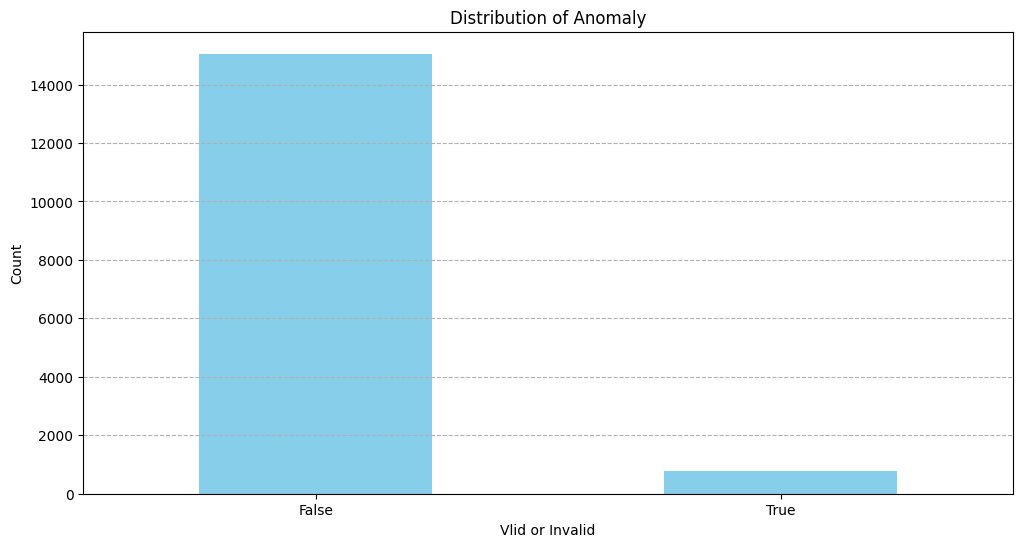

In [57]:
# Plotting the bar chart

plt.figure(figsize=(12, 6))
count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Anomaly')
plt.xlabel('Vlid or Invalid')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

### Handling Missing Values and Data Cleaning

In [58]:
df.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [59]:
# Importing label encoder 
from sklearn import preprocessing 

# Creating label encoder object
label_encoder = preprocessing.LabelEncoder() 

In [60]:
# Converting the Anomaly column to Numerical

df1=df.copy()
df1['is_anomaly']= label_encoder.fit_transform(df1['is_anomaly']) 

In [61]:
df1.dtypes

timestamp       int64
value           int64
is_anomaly      int64
predicted     float64
dtype: object

### Preprocessing for Model Building

In [62]:
# Features on which we will trian our model
X = df1[['timestamp', 'value','predicted']]  

# The value to be predicted 
y = df1['is_anomaly']

In [63]:
X.head()

timestamp  value  predicted
0  1425008573     42  44.072500
1  1425008873     41  50.709390
2  1425009173     41  81.405120
3  1425009473     61  39.950367
4  1425009773     44  35.350160

In [64]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_anomaly, dtype: int64

In [65]:
# Importing librareis for splitting the dataframe

from sklearn.model_selection import train_test_split

In [66]:
# Splitting the dataframe 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# to know the shape of training set

X_train.shape

(12664, 3)

In [68]:
# to know the shape of training set

y_train.shape

(12664,)

In [69]:
# to know the shape of testing set

X_test.shape

(3166, 3)

In [70]:
# to know the shape of testing set

y_test.shape

(3166,)

### Model Development 

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# List of classifiers
classifiers = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=20),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
    "SVC": SVC(kernel='rbf', probability=True),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=200)
}

# Dictionary to store the performance of each model
performance = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    performance[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Display performance
for model, metrics in performance.items():
    print(f"{model}:\nAccuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}\n")


KNeighborsClassifier:
Accuracy: 0.9485, Precision: 0.9448, Recall: 0.9485, F1 Score: 0.9258

DecisionTreeClassifier:
Accuracy: 0.9630, Precision: 0.9616, Recall: 0.9630, F1 Score: 0.9622

RandomForestClassifier:
Accuracy: 0.9719, Precision: 0.9697, Recall: 0.9719, F1 Score: 0.9700

SVC:
Accuracy: 0.9466, Precision: 0.8961, Recall: 0.9466, F1 Score: 0.9207

GaussianNB:
Accuracy: 0.9479, Precision: 0.9375, Recall: 0.9479, F1 Score: 0.9408

LogisticRegression:
Accuracy: 0.9466, Precision: 0.8961, Recall: 0.9466, F1 Score: 0.9207



c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
